In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

In [2]:
df=pd.read_csv('C:\\Users\\saipr\\Downloads\\50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.median()

R&D Spend           73051.080
Administration     122699.795
Marketing Spend    212716.240
Profit             107978.190
dtype: float64

In [6]:
df.max()

R&D Spend            165349
Administration       182646
Marketing Spend      471784
State              New York
Profit               192262
dtype: object

In [7]:
a=df.isnull()
print(a.head())

   R&D Spend  Administration  Marketing Spend  State  Profit
0      False           False            False  False   False
1      False           False            False  False   False
2      False           False            False  False   False
3      False           False            False  False   False
4      False           False            False  False   False


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df.State=le.fit_transform(df.State)

In [10]:
df.State

0     2
1     0
2     1
3     2
4     1
5     2
6     0
7     1
8     2
9     0
10    1
11    0
12    1
13    0
14    1
15    2
16    0
17    2
18    1
19    2
20    0
21    2
22    1
23    1
24    2
25    0
26    1
27    2
28    1
29    2
30    1
31    2
32    0
33    1
34    0
35    2
36    1
37    0
38    2
39    0
40    0
41    1
42    0
43    2
44    0
45    2
46    1
47    0
48    2
49    0
Name: State, dtype: int32

In [11]:
df.State.unique()

array([2, 0, 1])

In [12]:
x=df.drop('Profit',axis=1)

In [13]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [14]:
y=df['Profit']

In [15]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [16]:
print(x.shape,y.shape)

(50, 4) (50,)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [19]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(x_test)

In [22]:
y_pred

array([ 73981.88420695, 116600.64535235,  95963.39817105,  57813.64510955,
       134322.12760326,  99502.7575045 ,  97242.50244185, 100272.22749471,
        88156.21768576, 111721.89368363, 114781.99716474, 117218.84018458,
        73881.01246065])

In [23]:
lr.predict([[44069.95,51283.14,197029.42,0]])

array([89049.07446037])

In [24]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [25]:
score

0.8774986686978817

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [27]:
mse

48032030.67271337

<function matplotlib.pyplot.show(close=None, block=None)>

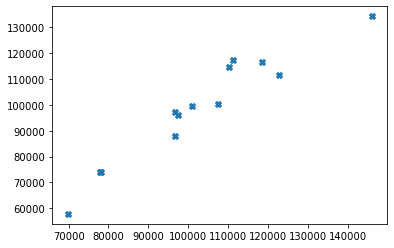

In [28]:
plt.scatter(y_test,y_pred,marker='X')
plt.show

In [29]:
cd=lr.intercept_

In [30]:
cf=lr.coef_